<a href="https://colab.research.google.com/github/y47love/PYTORCH/blob/main/%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98_%EC%A0%84%EC%9D%B4%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# kagglehub ÏÑ§Ïπò
!pip install kagglehub


In [2]:
import kagglehub

# Apparel Dataset Îã§Ïö¥Î°úÎìú
path = kagglehub.dataset_download("kaiska/apparel-dataset")

print("Path to dataset files:", path)


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 161M/161M [00:09<00:00, 18.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kaiska/apparel-dataset/versions/2


In [3]:
import os

# Îã§Ïö¥Î°úÎìúÌïú Îç∞Ïù¥ÌÑ∞ÏÖã Ìè¥Îçî Íµ¨Ï°∞ ÌôïÏù∏
for root, dirs, files in os.walk(path):
    print(root)
    for dir in dirs:
        print(f'  - {dir}')


/root/.cache/kagglehub/datasets/kaiska/apparel-dataset/versions/2
  - pink_skirt
  - brown_shoes
  - red_hoodie
  - white_shoes
  - pink_pants
  - blue_shirt
  - green_shorts
  - pink_hoodie
  - yellow_dress
  - red_shoes
  - red_shirt
  - green_shirt
  - black_pants
  - green_shoes
  - red_pants
  - black_suit
  - silver_shoes
  - black_shoes
  - brown_pants
  - black_shorts
  - brown_hoodie
  - black_shirt
  - blue_shoes
  - white_suit
  - red_dress
  - white_shorts
  - blue_pants
  - white_pants
  - green_suit
  - blue_shorts
  - silver_skirt
  - white_dress
  - black_dress
  - green_pants
  - blue_dress
  - yellow_shorts
  - yellow_skirt
/root/.cache/kagglehub/datasets/kaiska/apparel-dataset/versions/2/pink_skirt
/root/.cache/kagglehub/datasets/kaiska/apparel-dataset/versions/2/brown_shoes
/root/.cache/kagglehub/datasets/kaiska/apparel-dataset/versions/2/red_hoodie
/root/.cache/kagglehub/datasets/kaiska/apparel-dataset/versions/2/white_shoes
/root/.cache/kagglehub/datasets/kaiska/a

In [4]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú ÏÑ§Ï†ï
data_dir = '/root/.cache/kagglehub/datasets/kaiska/apparel-dataset/versions/2'

# Ïù¥ÎØ∏ÏßÄ Ï†ÑÏ≤òÎ¶¨ ÏÑ§Ï†ï (ResNetÏóê ÎßûÍ≤å ÌÅ¨Í∏∞ Ï°∞Ï†ï Î∞è Ï†ïÍ∑úÌôî)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


In [5]:
from sklearn.model_selection import train_test_split
import os
from torchvision.datasets import ImageFolder
import numpy as np

# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖã Î∂àÎü¨Ïò§Í∏∞
full_dataset = ImageFolder(root=data_dir, transform=transform)

# ÌÅ¥ÎûòÏä§ ÌôïÏù∏
class_names = full_dataset.classes
print(f"ÌÅ¥ÎûòÏä§ Ïàò: {len(class_names)}")
print(f"ÌÅ¥ÎûòÏä§ Î™©Î°ù: {class_names}")

# ÌïôÏäµÏö©(80%)Í≥º Í≤ÄÏ¶ùÏö©(20%) Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÎÇòÎàÑÍ∏∞
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(full_dataset, [train_size, val_size])

# DataLoader ÏÑ§Ï†ï
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


ÌÅ¥ÎûòÏä§ Ïàò: 37
ÌÅ¥ÎûòÏä§ Î™©Î°ù: ['black_dress', 'black_pants', 'black_shirt', 'black_shoes', 'black_shorts', 'black_suit', 'blue_dress', 'blue_pants', 'blue_shirt', 'blue_shoes', 'blue_shorts', 'brown_hoodie', 'brown_pants', 'brown_shoes', 'green_pants', 'green_shirt', 'green_shoes', 'green_shorts', 'green_suit', 'pink_hoodie', 'pink_pants', 'pink_skirt', 'red_dress', 'red_hoodie', 'red_pants', 'red_shirt', 'red_shoes', 'silver_shoes', 'silver_skirt', 'white_dress', 'white_pants', 'white_shoes', 'white_shorts', 'white_suit', 'yellow_dress', 'yellow_shorts', 'yellow_skirt']


In [6]:
from torchvision import models
import torch.nn as nn

# ÏÇ¨Ï†Ñ ÌïôÏäµÎêú ResNet18 Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
model = models.resnet18(pretrained=True)

# Ï∂úÎ†•Ï∏µ ÏàòÏ†ï (Apparel Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¥ÎûòÏä§ ÏàòÏóê ÎßûÍ≤å)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(class_names))  # ÌÅ¥ÎûòÏä§ ÏàòÏóê ÎßûÍ≤å Ï∂úÎ†•Ï∏µ ÏàòÏ†ï

# GPU ÏÑ§Ï†ï
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 44.7M/44.7M [00:00<00:00, 132MB/s]


In [7]:
# ÏÜêÏã§ Ìï®ÏàòÏôÄ ÏòµÌã∞ÎßàÏù¥Ï†Ä ÏÑ§Ï†ï
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [8]:
# Ï†ÑÏ≤¥ Ïù¥ÎØ∏ÏßÄ Í∞úÏàò ÌôïÏù∏
print(f"Ï¥ù Ïù¥ÎØ∏ÏßÄ Í∞úÏàò: {len(full_dataset)}")


Ï¥ù Ïù¥ÎØ∏ÏßÄ Í∞úÏàò: 16170


In [9]:
# ÌòÑÏû¨ ÏÇ¨Ïö© Ï§ëÏù∏ ÎîîÎ∞îÏù¥Ïä§ ÌôïÏù∏
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"ÏÇ¨Ïö© Ï§ëÏù∏ ÎîîÎ∞îÏù¥Ïä§: {device}")


ÏÇ¨Ïö© Ï§ëÏù∏ ÎîîÎ∞îÏù¥Ïä§: cuda


In [10]:
from torch.utils.data import random_split, DataLoader

# 1. Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïùò 10%Îßå ÏÇ¨Ïö©Ìï¥ÏÑú Îπ†Î•¥Í≤å ÌÖåÏä§Ìä∏ ÌïôÏäµ
subset_size = int(0.1 * len(train_dataset))  # 10%Îßå ÏÇ¨Ïö©
small_train_dataset, _ = random_split(train_dataset, [subset_size, len(train_dataset) - subset_size])

# 2. Îç∞Ïù¥ÌÑ∞ Î°úÎçî ÏÑ§Ï†ï (Î∞∞Ïπò ÌÅ¨Í∏∞ 64Î°ú Ï¶ùÍ∞Ä)
small_train_loader = DataLoader(small_train_dataset, batch_size=64, shuffle=True)

# 3. Î™®Îç∏ ÌïôÏäµ (Epoch 2Î°ú Ï§ÑÏûÑ)
num_epochs = 2
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for batch_idx, (images, labels) in enumerate(small_train_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # 5Î≤àÏß∏ Î∞∞ÏπòÎßàÎã§ ÏßÑÌñâ ÏÉÅÌô© Ï∂úÎ†•
        if (batch_idx + 1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(small_train_loader)}], Loss: {loss.item():.4f}')

    epoch_loss = running_loss / len(small_train_loader)
    epoch_acc = 100 * correct / total
    print(f'‚úÖ Epoch [{epoch+1}/{num_epochs}] ÏôÑÎ£å! Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')


Epoch [1/2], Batch [5/21], Loss: 1.7141
Epoch [1/2], Batch [10/21], Loss: 1.1302
Epoch [1/2], Batch [15/21], Loss: 0.9613
Epoch [1/2], Batch [20/21], Loss: 1.1142
‚úÖ Epoch [1/2] ÏôÑÎ£å! Loss: 1.5598, Accuracy: 57.85%
Epoch [2/2], Batch [5/21], Loss: 0.8454
Epoch [2/2], Batch [10/21], Loss: 0.4861
Epoch [2/2], Batch [15/21], Loss: 0.5156
Epoch [2/2], Batch [20/21], Loss: 0.4177
‚úÖ Epoch [2/2] ÏôÑÎ£å! Loss: 0.5136, Accuracy: 85.15%


In [11]:
# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏÖã ÌèâÍ∞Ä
model.eval()  # ÌèâÍ∞Ä Î™®ÎìúÎ°ú Ï†ÑÌôò
val_correct = 0
val_total = 0

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        val_total += labels.size(0)
        val_correct += (predicted == labels).sum().item()

# Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ Ï∂úÎ†•
val_acc = 100 * val_correct / val_total
print(f'üß™ Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ: {val_acc:.2f}%')


üß™ Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ: 69.48%


In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Ïù¥ÎØ∏ÏßÄ ÏãúÍ∞ÅÌôî Ìï®Ïàò Ï†ïÏùò
def imshow(img, title):
    img = img.cpu().numpy().transpose((1, 2, 0))  # ÌÖêÏÑúÎ•º Ïù¥ÎØ∏ÏßÄÎ°ú Î≥ÄÌôò (Ï±ÑÎÑê, ÎÜíÏù¥, ÎÑàÎπÑ ‚Üí ÎÜíÏù¥, ÎÑàÎπÑ, Ï±ÑÎÑê)
    mean = [0.485, 0.456, 0.406]  # Ï†ïÍ∑úÌôî Ìï¥Ï†ú (ÌèâÍ∑†)
    std = [0.229, 0.224, 0.225]   # Ï†ïÍ∑úÌôî Ìï¥Ï†ú (ÌëúÏ§ÄÌé∏Ï∞®)
    img = std * img + mean        # Ï†ïÍ∑úÌôî Î≥µÏõê
    img = np.clip(img, 0, 1)      # ÌîΩÏÖÄ Í∞íÏùÑ [0, 1] Î≤îÏúÑÎ°ú Ï†úÌïú
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()


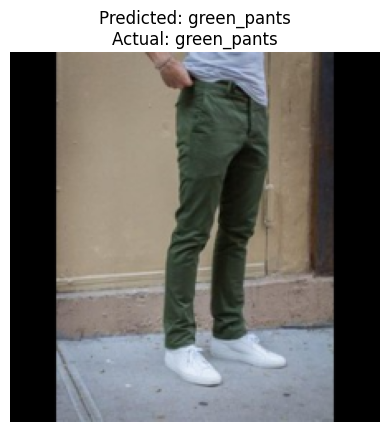

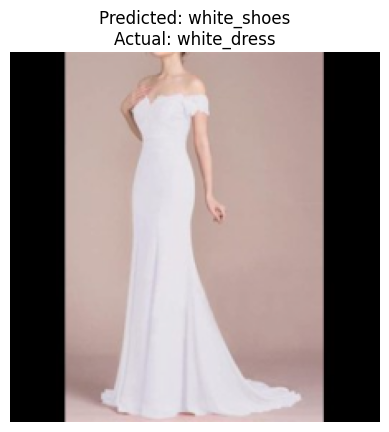

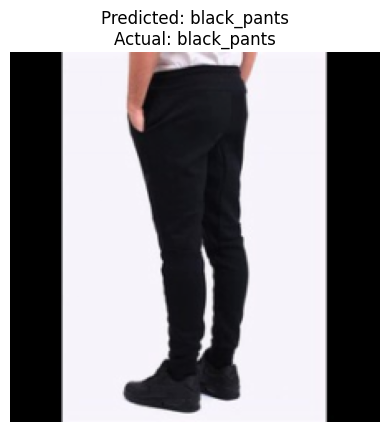

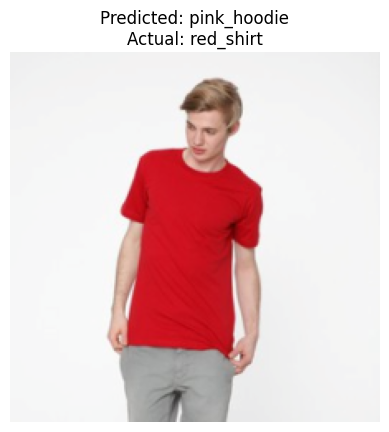

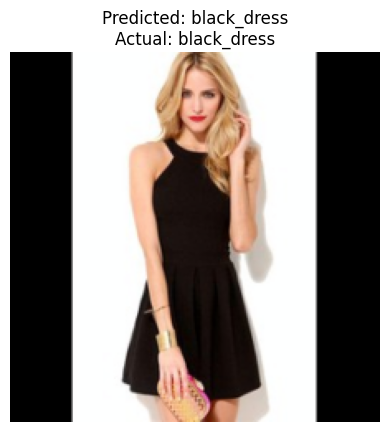

In [13]:
# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú ÏÉòÌîå Ïù¥ÎØ∏ÏßÄ Í∞ÄÏ†∏Ïò§Í∏∞
dataiter = iter(val_loader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)

# Î™®Îç∏ ÏòàÏ∏°
outputs = model(images)
_, preds = torch.max(outputs, 1)

# ÏÉÅÏúÑ 5Í∞ú Ïù¥ÎØ∏ÏßÄ ÏãúÍ∞ÅÌôî
for i in range(5):
    imshow(images[i], f'Predicted: {class_names[preds[i]]}\nActual: {class_names[labels[i]]}')


<Figure size 1000x1000 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54844 (\N{HANGUL SYLLABLE HON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47148 (\N{HANGUL SYLLABLE RYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


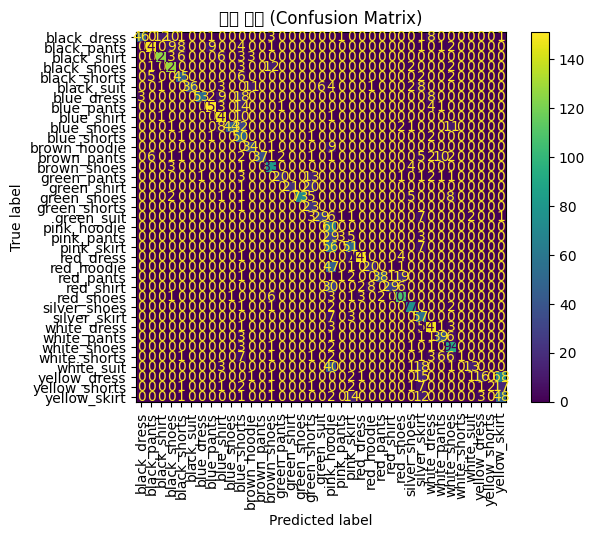

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Ï†ÑÏ≤¥ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ ÏòàÏ∏° ÏàòÌñâ
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# ÌòºÎèô ÌñâÎ†¨ ÏÉùÏÑ±
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 10))
disp.plot(xticks_rotation='vertical')
plt.title("ÌòºÎèô ÌñâÎ†¨ (Confusion Matrix)")
plt.show()


ÌòºÎèô ÌñâÎ†¨ Í∞ÑÎã® Ìï¥ÏÑù
Ï†ÑÎ∞òÏ†ÅÏù∏ ÏÑ±Îä•

ÎåÄÍ∞ÅÏÑ†(‚Üò) Î∂ÄÎ∂ÑÏù¥ Î∞ùÏùÄ ÎÖ∏ÎûÄÏÉâÏúºÎ°ú ÌëúÏãúÎêú Í±∏ Î≥¥ÏïÑ, Î™®Îç∏Ïù¥ ÎåÄÎ∂ÄÎ∂ÑÏùò ÌÅ¥ÎûòÏä§Î•º Ï†ïÌôïÌïòÍ≤å Î∂ÑÎ•òÌñàÏäµÎãàÎã§.
Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú ÏÑ±Îä•Ïù¥ Ïö∞ÏàòÌïú Ìé∏ÏûÖÎãàÎã§.
ÏûêÏ£º ÌòºÎèôÎêú ÌÅ¥ÎûòÏä§

black_shoes vs black_shorts: ÏÉâÏÉÅÏù¥ Í∞ôÏïÑ Î™®Îç∏Ïù¥ Ìó∑Í∞àÎ¶¥ Ïàò ÏûàÏùå.
red_shoes vs brown_shoes: Ïã†Î∞ú ÏÉâÏù¥ ÎπÑÏä∑Ìï¥ ÌòºÎèô Î∞úÏÉù.
white_shirt vs white_dress: Ìù∞ÏÉâ ÏÉÅÏùòÏôÄ ÎìúÎ†àÏä§ Íµ¨Î∂ÑÏù¥ Ïñ¥Î†§ÏõÄ.
Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†Ìòï

ÏùºÎ∂Ä ÌÅ¥ÎûòÏä§(Ïòà: silver_skirt)Ïùò ÏòàÏ∏° ÏàòÍ∞Ä Ï†ÅÏùÄ Í≤ΩÏö∞, ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Í∞Ä Î∂ÄÏ°±ÌñàÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏäµÎãàÎã§.
Í∞úÏÑ† Î∞©Ïïà

Fine-Tuning: Î™®Îç∏Ïùò ÏùºÎ∂Ä Î†àÏù¥Ïñ¥Î•º ÎØ∏ÏÑ∏ Ï°∞Ï†ïÌïòÎ©¥ Îçî ÎÇòÏùÄ Í≤∞Í≥ºÎ•º ÏñªÏùÑ Ïàò ÏûàÏùå.
Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï: ÌöåÏ†Ñ, ÌôïÎåÄ Îì±Ïùò Í∏∞Î≤ïÏúºÎ°ú Ìó∑Í∞àÎ¶¨Îäî ÌÅ¥ÎûòÏä§Î•º Îçî ÌïôÏäµ.
Î∂àÍ∑†Ìòï Ìï¥ÏÜå: Î∂ÄÏ°±Ìïú ÌÅ¥ÎûòÏä§Ïùò Îç∞Ïù¥ÌÑ∞Î•º Ï∂îÍ∞ÄÌïòÍ±∞ÎÇò Í∞ÄÏ§ëÏπò Î≥¥Ï†ï.

In [15]:
# Î™®Îç∏ Ï†ÄÏû•
torch.save(model.state_dict(), 'apparel_model.pth')
print("Î™®Îç∏Ïù¥ Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§!")


Î™®Îç∏Ïù¥ Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§!


In [ ]:
# Ï†ÄÏû•Îêú Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
model.load_state_dict(torch.load('apparel_model.pth'))
model.eval()
